In [27]:
import sys
sys.path.insert(0,'python')
from fastRWpkl import *
import pylab as plt
import numpy.ma as ma
from scipy.stats import gaussian_kde
%matplotlib inline
import scipy.stats
import matplotlib.gridspec as gridspec
from scipy.stats import gaussian_kde

In [2]:
mods = parallel_rw_pkl(0, 'C6_modis2', 'r')

In [3]:
mask1 = parallel_rw_pkl(0, 'C6_modism2', 'r')

<matplotlib.colorbar.Colorbar instance at 0x7f7bd13c2560>

/home/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


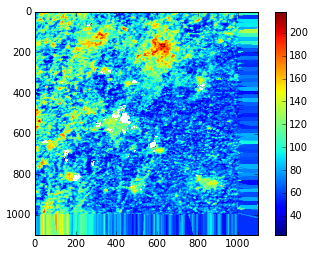

In [4]:
plt.imshow(ma.array(mods, mask=mask1)[::10,::10])
plt.colorbar()

In [5]:
c5mods = parallel_rw_pkl(0, 'inter_sent2', 'r')

In [6]:
mask2 = parallel_rw_pkl(0, 'inter_sentm2', 'r')

<matplotlib.colorbar.Colorbar instance at 0x7f7b9bcc4bd8>

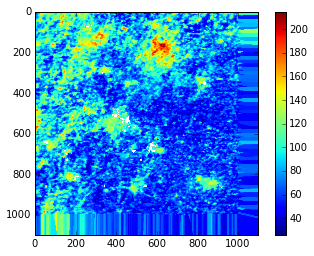

In [7]:
plt.imshow(ma.array(c5mods, mask=mask2)[::10,::10])
plt.colorbar()

In [8]:
dif = (ma.array(mods, mask = mask1)-ma.array(c5mods, mask=mask2))[:10000, :10000]

<matplotlib.colorbar.Colorbar instance at 0x7f7bcedeab48>

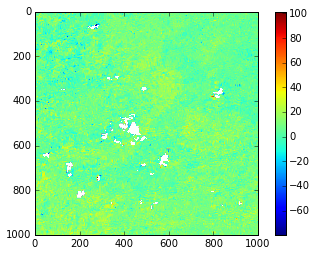

In [9]:
plt.imshow(dif[::10,::10])
plt.colorbar()

In [10]:
np.nanmean(dif),np.nanstd(dif)

(8.3483387271427656, 7.6396338582975201)

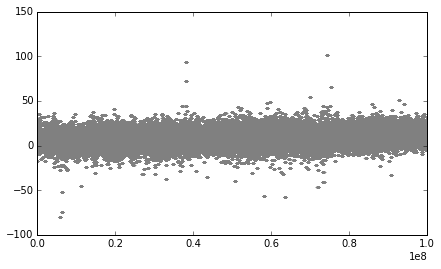

In [21]:
plt.figure(figsize=(7,4))
plt.plot(dif.flatten(), '+', markersize=2, color='gray')

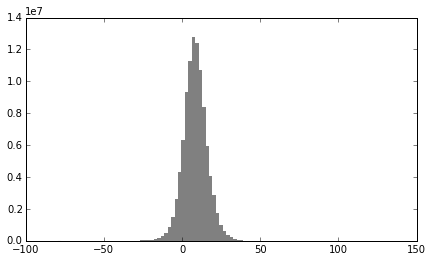

In [20]:
plt.figure(figsize=(7,4))
a = plt.hist(dif[dif<500].flatten(), bins = 100, color = 'gray', linewidth=0)

Generally, collection6 has a higher value than the collection5 for this area with the kernel calculated BRDF, which is adjusted to the loca viewing and solar zenith angle. 

In [22]:
b4_modis = parallel_rw_pkl(None, 'C6Rb4_modis', 'r')
b2_modis = parallel_rw_pkl(None, 'C6Rb2_modis', 'r')
b3_modis = parallel_rw_pkl(None, 'C6Rb3_modis', 'r')
b8_modis = parallel_rw_pkl(None, 'C6Rb8_modis', 'r')
b8a_modis = parallel_rw_pkl(None, 'C6Rb8a_modis', 'r')
b11_modis = parallel_rw_pkl(None, 'C6Rb11_modis', 'r')
b12_modis = parallel_rw_pkl(None, 'C6Rb12_modis', 'r')
bands = []
for j in [b2_modis,b3_modis,b4_modis,b8_modis,b8a_modis,b11_modis,b12_modis]:
    
    data = []
    for i in j:
        data+=i
    bands.append(data)
names = ('SB2_MB3,SB3_MB4,SB4_MB1,SB8_MB2,SB8a_MB2,SB11_MB6,SB12_MB7').split(',')

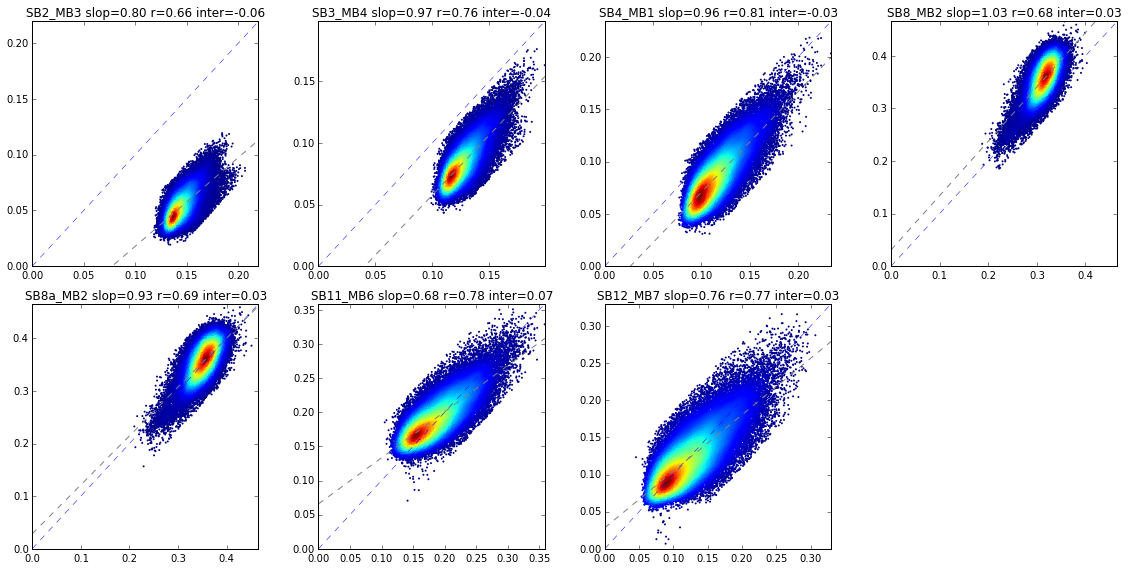

In [28]:
fig = plt.figure
gs = gridspec.GridSpec(2,4)  # generate a grid space
fig = plt.figure(figsize=(16,8))

for i in range(7):
    ax = fig.add_subplot(gs[i])
    
    data = np.array(bands[i])
    maxval = np.nanmax(data)
    m = data[:,0][~(np.isnan(data[:,1])|np.isnan(data[:,0]))]
    s = data[:,1][~(np.isnan(data[:,1])|np.isnan(data[:,0]))]
    
    dif = m-s
    sigma = np.nanstd(dif)
    mean = np.nanmean(dif)
    
    Thr_sigma = 3.*sigma
    inliers = (dif < mean+3*sigma)&(dif > mean-3*sigma)
    
    m = m[inliers]
    s = s[inliers]

    r = scipy.stats.linregress(m,s) # all of the data composed of mean value and brdf
    fit = np.polyfit(m,s,1)
    fit_fn = np.poly1d(fit)
    #plt.figure(figsize = (7,7))
    xy = np.vstack([m,s])
    z = gaussian_kde(xy)(xy)
    ax.scatter(m,s, c=z, s=4, edgecolor='')
    ax.plot([0,1],[0.,1], '--',linewidth=0.5)
    ax.plot(np.arange(0,1,0.1), fit_fn(np.arange(0,1,0.1)), '--', color='grey')
    ax.set_xlim(0, maxval)
    ax.set_ylim(0, maxval)
    ax.set_title('%s'%names[i]+' slop=%.2f'%r.slope+' r=%.2f'%r.rvalue+' inter=%.2f'%r.intercept)
plt.tight_layout()

Compared to the previous results, it turns out that the results becomes worth in terms of the regression relationship between them